### Linear Programming

Linear programming is a method to achieve the best outcome (maximum profit/minimum profit) in a mathematical model. The objective function is to optimize a linear objective function, subject to non-negative, linear equality and inequality constraints.

#### key terms

1. Decision variables: variables that decision-makers control to optimize the objective function
2. Objective function: The mathematical expression representing the quantity to be maximized or minimized
3. Constraints: The restrictions/limitations on the decision variables. Constraints can be represented as linear inequalities or equalities
4. Feasible region: the set of all possible solutions that satisfy the constraints
5. Optimal solution: the solution that maximizes or minimizes the objective function within the feasible region

### standard form
- For a vector $\mathbf{x}$
- Linear function to be maximized $\mathbf{c^T}\mathbf{x}$
- problem constraint $\mathrm{A}\mathbf{x} \leq \mathrm{b}$ and
- Non-negative variables $\mathbf{x} \geq \mathbf{0}$

$$
\begin{array}{rc}
\text{maximize:} & c_0x_0 + \cdots + c_{n-1}x_{n-1} \\
\text{subject to:} & a_{0,0}x_0 + \cdots + a_{0,n-1}x_{n-1} \leq b_0 \\
& a_{1,0}x_0 + \cdots + a_{1,n-1}x_{n-1} \leq b_1 \\
& \vdots \\
& a_{m-1,0}x_0 + \cdots + a_{m-1,n-1}x_{n-1} \leq b_{m-1} \\
& x_0 \geq 0, \dots , x_{n-1} \geq 0
\end{array}
$$

(Walls, 2024, lecture5)

### Finding the number of vertices
- linear inequalities are represented by half-space which satisfies all the points in a boundary or line
- The intersection of half-space creates a polytope (feasible region)
- Let n bet the total number of decision variables (non-basic variables)
- Let m be the number of constraints (non-basic variables)
- We can find the total number of vertices in a polytope by choosing n elements from a set of n+m elements (total variables) $\begin{pmatrix} n+m \\ n \end{pmatrix}$

### Finding optimal solution
In general, it is possible to find all vertices of the feasible region and evaluate the objective function $\mathrm{C}^T\mathbf{x}$ at each vertex to find the optimal solution. However, if there are many vertices, it will be time-consuming to compute the optimal solution at every vertices.

The objective function defines a hyperplane that passes through orthogonally to the vertex of the polytope, and therefore can contain non-optimal solution. The optimal solution corresponds to the point where the objective function hyperplane is orthogonal to the half-spaces created by the inequalities. Therefore, we need to compute the objective function at each point of the vertex. 


### Enumerating Vertices for 2-D problem

There are only 2 decision variables in a 2-d problem. In general, the feasible region would look like a triangle or quadrilateral in a graph.

**Step 1: Defining the problem**

Suppose a winemaker is deciding how many barrels of red wine or white wine to produce. The profit in making red wine is \$ 5 and the profit in making white wine is \$ 7. Red wine needs 65 litres of grape juice, while white wine needs 55 litres of grape juice. The winemaker only have 1200 liters of grape juice. It takes 25 sqft and 35 sqft to store red wine and white wine respectively. The maximum capacity is 355 sqft. 

**Step 2: Identifying the objective functions decision variables, and constraints**

Decision Variables:
* $a$ : red wine
* $b$ : white wine

Objective function: Maximize $5b + 7b$

Constraints: 
- $65a + 55b \leq 1200$ ingredient capacity
- $25a + 35b \leq 600$ warehouse capacity
- $ a \geq 0, b \geq 0$

**Step 3: Stating the assumptions**
no assumptions

**Step 4: Building the solution**

Text(0, 0.5, 'b')

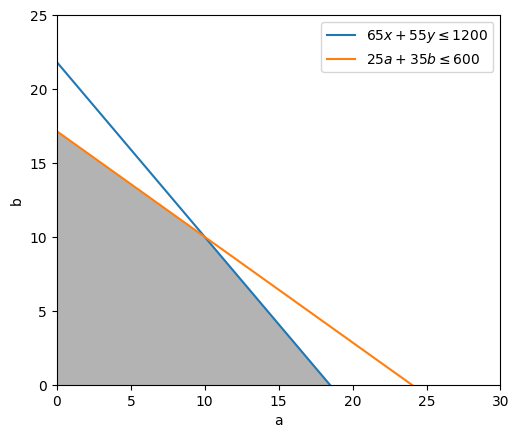

In [1]:
# plotting a graph
import math
import numpy as np
import matplotlib.pyplot as plt

d = np.linspace(0, 30, 1000)
x, y = np.meshgrid(d,d)
plt.imshow(((65*x+55*y<=1200) & (25*x+35*y<=600)).astype(int), 
    extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha = 0.3)

x = np.linspace(0,30,1000)
y1 = (1200-(65*x))/55
y2 = (600-(25*x))/35

# plot
plt.plot(x, y1, label="$65x+55y \leq 1200$")
plt.plot(x, y2, label="$25a + 35b \leq 600$")
plt.xlim(0,30)
plt.ylim(0,25)
plt.legend()
plt.xlabel(r'a')
plt.ylabel(r'b')

There are 2 decision variables and 2 constraints, so we have ${n+m \choose n} = {2+2 \choose 2} = 4$ vertices

There are 4 vertices:
- (0,0)
- intersection through axis y
- intersection of the two plot lines
- intersection through axis x

In [2]:
# The point of intersection through axis y
a = (600-25*0)/35
print('The coordinate is: (0,', a, ')')

The coordinate is: (0, 17.142857142857142 )


#### Using linear algebra to solve the intersection

In [3]:
import scipy.linalg as la

# transforming the equation into Ax + wI = b
A = np.array([[65,55],[25,35]])
I = np.eye(2) # since there are two constraints
T = np.hstack([A,I])
b = np.array([[1200],[600]])
print(T[:,[1,2]])

[[55.  1.]
 [35.  0.]]


Then, we have:

$
\begin{bmatrix}
55 & 1 \\
35 & 0 
\end{bmatrix}$
\=
$
\begin{bmatrix}
1200 \\
600
\end{bmatrix}
$

Thus, we are actually calculating 600/35.

In [4]:
y_intersection = la.solve(T[:,[1,2]],b)
print('The coordinate is', y_intersection)

The coordinate is [[ 17.14285714]
 [257.14285714]]


In [5]:
# The point of intersection through axis y
a = (600-25*0)/35
print('The coordinate is: (0,', a, ')')

The coordinate is: (0, 17.142857142857142 )


In [6]:
# coordinate of intersection of the two plot lines
intersection = la.solve(A,b)
print('The coordinate is', intersection)

# using linalg
intersection = la.solve(T[:,[0,1]],b)
print('Using linalg, the coordinate is', intersection)

# The point of intersection through axis x
x = (1200-(55*0))/65
print('The coordinate is: (', x , ', 0)')

print(T[:,[0,3]])
# calculating 1200/65
x_intersection = la.solve(T[:,[0,3]], b)
print('The coordinate is', x_intersection)

The coordinate is [[10.]
 [10.]]
Using linalg, the coordinate is [[10.]
 [10.]]
The coordinate is: ( 18.46153846153846 , 0)
[[65.  0.]
 [25.  1.]]
The coordinate is [[ 18.46153846]
 [138.46153846]]


### Python program to find vertices of bounded LP Problem
**Assumptions:**
* The LP is a maximization problem
* The LP is a less than or equal to linear inequality problem

Steps:

1. Define a function that takes in an array A and array b that conforms to the standard LP problem
2. Add slack variables to transform into an equality constraint

In [7]:
def addSlack(A):
    #find how many constraints A have
    m = len(A)
    #add slack variables
    I = np.eye(m)
    T = np.hstack([A,I]) 
    return T

3. Create a function that checks if there are negative numbers in the array ()
4. Loop through each vertices combination
    - solve Ax + wI = b
    - print basic variables
    - check if matrix is singular
    - check for negatives
    - print the vertex

* check for negatives: we cannot have negative values in the objective function coefficients because $x \geq 0$
* check if matrix is non-singular: there is a unique solution and we can check by making sure there is no zero row entry in the matrix
\begin{bmatrix}
\ddots & \ddots & \ddots\\
\vdots & \vdots &  \vdots\\
0 & 0 & 0
\end{bmatrix}

In [8]:
import itertools

def checkNegative(array):
    return np.any(array < 0)

def checkZero(array):
    return np.any(np.all(array==0,axis=1))

def getVertex(A,b):
    T = addSlack(A)
    n = T.shape[1] # number of columns in matrix
    # Generate combinations
    basic = itertools.combinations(range(n),len(A)) 
    v = []
    for c in basic:
        if (checkZero(T[:,c])): pass
        else: 
            s = la.solve(T[:,c],b)
            # skip negative because all variables should be greater or equal to 0
            if (checkNegative(s)): pass
            else: 
                x = np.zeros(n)
                x[list(c)] = s.flatten()
                v.append(x[:len(c)])
    return v

5. Define a function that loop through the vertices

In [9]:
def findMax(A, b, c):
    # c is the coefficient of the objective function
    max = -10000
    vertices = getVertex(A,b)
    for vertex in vertices:
        sum = np.dot(vertex, c)
        if (sum > max):
            max = sum
    return max

### Example: Diet Problem
A = 
$\begin{bmatrix}
-90 & -120 & -106 & -97 & -130 & -180 \\
4 & 8 & 7 & 1.3 & 8 & 9.2 \\
-15 & -11.7 & -0.4 & -22.6 & 0 & -17 \\
-1 & -5 & -9 & -0.1 & -7 & -1\\
0 & 0 & 0 & 0 & -1 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
\end{bmatrix}$
b = 
$\begin{bmatrix}
-300 \\
10 \\
-10 \\
-8 \\
-0.5 \\
1
\end{bmatrix}$
c = 
$\begin{bmatrix}
-2 \\
-3.5 \\ 
-8 \\ 
-1.5 \\ 
-11 \\ 
-1 \\
\end{bmatrix}$

SAS Institute Inc. (2022). SAS/OR(R) 14.2 User's Guide: Mathematical Programming Examples. Cary, NC: SAS Institute Inc. Available online: https://documentation.sas.com/doc/en/orcdc/14.2/ormpug/ormpug_lpsolver_examples01.htm

In [10]:
A = np.array([[-90,-120,-106, -97, -130, -180],[4,8,7,1.3,8,9.2],[-15,-11.7,-0.4,-22.6,0,-17],[-1,-5,-9,-0.1,-7,-1],[0,0,0,0,-1,0],[0,1,0,0,0,0]])
b = np.array([[-300],[10],[-10],[-8],[-0.5],[1]])
c = np.array([[-2],[-3.5],[-8],[-1.5],[-11],[-1]])

print(findMax(A,b,c))

[-12.08133788]


C:\Users\Owner\AppData\Local\Temp\ipykernel_18544\2977854686.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=1.05076e-20): result may not be accurate.
  s = la.solve(T[:,c],b)


From the SAS Institute Inc. (2022), the solution of the objective value is 12.08133788. The output is negative because I converted the problem to fit into the standard form for the function to work properly. Thus, from $\min \sum_i c_i x_i$ it becomes $\max -\sum_i c_i x_i$. Thus, the minimum objective value is 12.08133788, so we have found the right answer.

### Compare to python library methods

Softwares to calculate linear programming
1. SciPy.optimize using linprog
2. CVXPY
3. puLP 
4. Google OR-Tools

In [11]:
from scipy.optimize import linprog
import cvxpy as cp
from pulp import *
from ortools.linear_solver import pywraplp

(CVXPY) Feb 29 12:04:50 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 29 12:04:50 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


**Create dataframe to record time for each software computation time**

In [12]:
import pandas as pd
from timeit import default_timer as timer

df = pd.DataFrame({'findMax':[], 'scipy':[], 'CVXPY':[], 'puLP':[], 'ortools':[]})

#### Create random matrix (5 decision variables and 5 constraints)

${n+m \choose n} = {5+5 \choose 5} = 252$ vertices

In [13]:
A = np.random.randint(0, 250, size=(5,5))
b = np.random.randint(0, 250,size=(1,5)).flatten()
c = np.random.randint(0, 250,size=(1,5)).flatten()

**Compute time for each method using timer() function**

In [14]:
#compute time for function
start = timer()
lp = findMax(A,b,c)
end = timer()
df.loc[0, 'findMax'] = end - start
print(lp)

#compute time for linprog
start = timer()
lp = linprog(-c, A_ub = A, b_ub = b)
end = timer()
df.loc[0, 'scipy'] = end - start
print(lp.fun)

#compute time for CVXPY
x = cp.Variable(5)
problem = cp.Problem(cp.Maximize(c@x), [A@x <= b, x >= 0])
start = timer()
problem.solve()
end = timer()
df.loc[0, 'CVXPY'] = end - start
print(problem.value)

# transform matrix to fit pulp
problem = LpProblem("random", LpMaximize)
n = 5
m = 5
# decision variables
x = LpVariable.dicts("x", range(n), lowBound=0, cat=LpContinuous)
# objective function
problem += lpSum([c[i] * x[i] for i in range(n)])
# constraints
for i in range(m):
    problem += lpSum([A[i][j] * x[j] for j in range(n)]) <= b[i]
# compute time for pulp
start = timer()
problem.solve()
end = timer()
df.loc[0, 'puLP'] = end - start
print(value(problem.objective))

#transform the matrix to fit ortools
data = {}
data["constraint_coeffs"] = A.tolist()
data["bounds"] = b.tolist()
data["obj_coeffs"] = c.tolist()
data["num_vars"] = 5
data["num_constraints"] = 5

solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()
x = {}
for j in range(data["num_vars"]):
    x[j] = solver.IntVar(0, infinity, "x[%i]" % j)

for i in range(data['num_constraints']):
    constraint_expr = \
    [data['constraint_coeffs'][i][j] * x[j] for j in range(data['num_vars'])]
    solver.Add(sum(constraint_expr) <= data['bounds'][i])

objective = solver.Objective()
obj_expr = [data['obj_coeffs'][j] * x[j] for j in range(data['num_vars'])]
solver.Maximize(solver.Sum(obj_expr))

#compute time for ortools
start = timer()
status = solver.Solve()
end = timer()
df.loc[0, 'ortools'] = end - start
print(solver.Objective().Value())

229.37704231252619
-229.37704231252624
229.3770425749111
229.37704707999998
229.37704231252616


c:\Users\Owner\miniconda3\envs\comet\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


**code for ortools are taken from 
Google. OR-Tools: Mixed-Integer Programming (MIP) Variable Arrays. https://developers.google.com/optimization/mip/mip_var_array

### Create random matrix (10 decision variables and 10 constraints)

${n+m \choose n} = {20\choose 10} = 184,756$ vertices

**Compute time for 10 decision variables and 10 constraints**

In [15]:
A = np.random.randint(0, 250, size=(10,10))
b = np.random.randint(0, 250,size=(1,10)).flatten()
c = np.random.randint(0, 250,size=(1,10)).flatten()

In [16]:
#compute time for function
start = timer()
lp = findMax(A,b,c)
end = timer()
df.loc[1, 'findMax'] = end - start
print(lp)

#compute time for linprog
start = timer()
lp = linprog(-c, A_ub = A, b_ub = b)
end = timer()
df.loc[1, 'scipy'] = end - start
print(lp.fun)

#compute time for CVXPY
x = cp.Variable(10)
problem = cp.Problem(cp.Maximize(c@x), [A@x <= b, x >= 0])
start = timer()
problem.solve()
end = timer()
df.loc[1, 'CVXPY'] = end - start
print(problem.value)

# transform matrix to fit pulp
problem = LpProblem("random", LpMaximize)
n = 10
m = 10
# decision variables
x = LpVariable.dicts("x", range(n), lowBound=0, cat=LpContinuous)
# objective function
problem += lpSum([c[i] * x[i] for i in range(n)])
# constraints
for i in range(m):
    problem += lpSum([A[i][j] * x[j] for j in range(n)]) <= b[i]
# compute time for pulp
start = timer()
problem.solve()
end = timer()
df.loc[1, 'puLP'] = end - start
print(value(problem.objective))

#transform the matrix to fit ortools
data = {}
data["constraint_coeffs"] = A.tolist()
data["bounds"] = b.tolist()
data["obj_coeffs"] = c.tolist()
data["num_vars"] = 10
data["num_constraints"] = 10

solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()
x = {}
for j in range(data["num_vars"]):
    x[j] = solver.IntVar(0, infinity, "x[%i]" % j)

for i in range(data['num_constraints']):
    constraint_expr = \
    [data['constraint_coeffs'][i][j] * x[j] for j in range(data['num_vars'])]
    solver.Add(sum(constraint_expr) <= data['bounds'][i])

objective = solver.Objective()
obj_expr = [data['obj_coeffs'][j] * x[j] for j in range(data['num_vars'])]
solver.Maximize(solver.Sum(obj_expr))

#compute time for ortools
start = timer()
status = solver.Solve()
end = timer()
df.loc[1, 'ortools'] = end - start
print(solver.Objective().Value())

42.61756929033477
-42.61756929033477
42.61756929283318
42.617569304999996
42.61756929033477


**Note: The function written may not work sometimes because the matrix generated does not have an optimal solution (unbounded lp problem). Generate another matrix to compute the time.

### Create random matrix (12 decision variables and 12 constraints)

${n+m \choose n} = {24\choose 12} = 2,704,156$

**Compute time for 12 decision variables and 12 constraints**

In [19]:
A = np.random.randint(0, 250, size=(12,12)) # 12 constraints with 12 decision variables
b = np.random.randint(0, 1000,size=(1,12)).flatten()
c = np.random.randint(0, 250,size=(1,12)).flatten()

In [23]:
#compute time for function
start = timer()
lp = findMax(A,b,c)
end = timer()
df.loc[2, 'findMax'] = end - start
print(lp)

#compute time for linprog
start = timer()
lp = linprog(-c, A_ub = A, b_ub = b)
end = timer()
df.loc[2, 'scipy'] = end - start
print(lp.fun)

#compute time for CVXPY
x = cp.Variable(12)
problem = cp.Problem(cp.Maximize(c@x), [A@x <= b, x >= 0])
start = timer()
problem.solve()
end = timer()
df.loc[2, 'CVXPY'] = end - start
print(problem.value)

# transform matrix to fit pulp
problem = LpProblem("random", LpMaximize)
n = 12
m = 12
# decision variables
x = LpVariable.dicts("x", range(n), lowBound=0, cat=LpContinuous)
# objective function
problem += lpSum([c[i] * x[i] for i in range(n)])
# constraints
for i in range(m):
    problem += lpSum([A[i][j] * x[j] for j in range(n)]) <= b[i]
# compute time for pulp
start = timer()
problem.solve()
end = timer()
df.loc[2, 'puLP'] = end - start
print(value(problem.objective))

#transform the matrix to fit ortools
data = {}
data["constraint_coeffs"] = A.tolist()
data["bounds"] = b.tolist()
data["obj_coeffs"] = c.tolist()
data["num_vars"] = 12
data["num_constraints"] = 12

solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()
x = {}
for j in range(data["num_vars"]):
    x[j] = solver.IntVar(0, infinity, "x[%i]" % j)

for i in range(data['num_constraints']):
    constraint_expr = \
    [data['constraint_coeffs'][i][j] * x[j] for j in range(data['num_vars'])]
    solver.Add(sum(constraint_expr) <= data['bounds'][i])

objective = solver.Objective()
obj_expr = [data['obj_coeffs'][j] * x[j] for j in range(data['num_vars'])]
solver.Maximize(solver.Sum(obj_expr))

#compute time for ortools
start = timer()
status = solver.Solve()
end = timer()
df.loc[2, 'ortools'] = end - start
print(solver.Objective().Value())

242.2555638675892
-242.25556386758925
242.25556389988276
242.255564029
242.2555638675893


c:\Users\Owner\miniconda3\envs\comet\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


### Create random matrix (13 decision variables and 13 constraints)

${n+m \choose n} = {26\choose 13} = 10,400,600$ vertices

**Compute time for 13 decision variables and 13 constraints**

In [31]:
A = np.random.randint(0, 250, size=(13,13)) # 13 constraints with 13 decision variables
b = np.random.randint(0, 1000,size=(1,13)).flatten()
c = np.random.randint(0, 250,size=(1,13)).flatten()

In [33]:
#compute time for function
start = timer()
lp = findMax(A,b,c)
end = timer()
df.loc[3, 'findMax'] = end - start
print(lp)

#compute time for linprog
start = timer()
lp = linprog(-c, A_ub = A, b_ub = b)
end = timer()
df.loc[3, 'scipy'] = end - start
print(lp.fun)

#compute time for CVXPY
x = cp.Variable(13)
problem = cp.Problem(cp.Maximize(c@x), [A@x <= b, x >= 0])
start = timer()
problem.solve()
end = timer()
df.loc[3, 'CVXPY'] = end - start
print(problem.value)

# transform matrix to fit pulp
problem = LpProblem("random", LpMaximize)
n = 13
m = 13
# decision variables
x = LpVariable.dicts("x", range(n), lowBound=0, cat=LpContinuous)
# objective function
problem += lpSum([c[i] * x[i] for i in range(n)])
# constraints
for i in range(m):
    problem += lpSum([A[i][j] * x[j] for j in range(n)]) <= b[i]
# compute time for pulp
start = timer()
problem.solve()
end = timer()
df.loc[3, 'puLP'] = end - start
print(value(problem.objective))

#transform the matrix to fit ortools
data = {}
data["constraint_coeffs"] = A.tolist()
data["bounds"] = b.tolist()
data["obj_coeffs"] = c.tolist()
data["num_vars"] = 13
data["num_constraints"] = 13

solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()
x = {}
for j in range(data["num_vars"]):
    x[j] = solver.IntVar(0, infinity, "x[%i]" % j)

for i in range(data['num_constraints']):
    constraint_expr = \
    [data['constraint_coeffs'][i][j] * x[j] for j in range(data['num_vars'])]
    solver.Add(sum(constraint_expr) <= data['bounds'][i])

objective = solver.Objective()
obj_expr = [data['obj_coeffs'][j] * x[j] for j in range(data['num_vars'])]
solver.Maximize(solver.Sum(obj_expr))

#compute time for ortools
start = timer()
status = solver.Solve()
end = timer()
df.loc[3, 'ortools'] = end - start
print(solver.Objective().Value())

233.81081081081058
-233.81081081081123
233.8108110640155
233.81080909999997
233.81081081081086


C:\Users\Owner\AppData\Local\Temp\ipykernel_18544\2977854686.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=3.58519e-22): result may not be accurate.
  s = la.solve(T[:,c],b)
c:\Users\Owner\miniconda3\envs\comet\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


### Create random matrix (15 decision variables and 20 constraints)

${n+m \choose n} = {35\choose 15} = 3,247,943,160$ vertices

**Compute time for 15 decision variables and 20 constraints**

In [40]:
A = np.random.randint(0, 250, size=(20,15)) # 20 constraints with 15 decision variables
b = np.random.randint(0, 1000,size=(1,20)).flatten()
c = np.random.randint(0, 250,size=(1,15)).flatten()

In [41]:
#compute time for linprog
start = timer()
lp = linprog(-c, A_ub = A, b_ub = b)
end = timer()
df.loc[4, 'scipy'] = end - start
print(lp.fun)

#compute time for CVXPY
x = cp.Variable(15)
problem = cp.Problem(cp.Maximize(c@x), [A@x <= b, x >= 0])
start = timer()
problem.solve()
end = timer()
df.loc[4, 'CVXPY'] = end - start
print(problem.value)

# transform matrix to fit pulp
problem = LpProblem("random", LpMaximize)
n = 15
m = 20
# decision variables
x = LpVariable.dicts("x", range(n), lowBound=0, cat=LpContinuous)
# objective function
problem += lpSum([c[i] * x[i] for i in range(n)])
# constraints
for i in range(m):
    problem += lpSum([A[i][j] * x[j] for j in range(n)]) <= b[i]
# compute time for pulp
start = timer()
problem.solve()
end = timer()
df.loc[4, 'puLP'] = end - start
print(value(problem.objective))

#transform the matrix to fit ortools
data = {}
data["constraint_coeffs"] = A.tolist()
data["bounds"] = b.tolist()
data["obj_coeffs"] = c.tolist()
data["num_vars"] = 15
data["num_constraints"] = 20

solver = pywraplp.Solver.CreateSolver("GLOP")
infinity = solver.infinity()
x = {}
for j in range(data["num_vars"]):
    x[j] = solver.IntVar(0, infinity, "x[%i]" % j)

for i in range(data['num_constraints']):
    constraint_expr = \
    [data['constraint_coeffs'][i][j] * x[j] for j in range(data['num_vars'])]
    solver.Add(sum(constraint_expr) <= data['bounds'][i])

objective = solver.Objective()
obj_expr = [data['obj_coeffs'][j] * x[j] for j in range(data['num_vars'])]
solver.Maximize(solver.Sum(obj_expr))

#compute time for ortools
start = timer()
status = solver.Solve()
end = timer()
df.loc[4, 'ortools'] = end - start
print(solver.Objective().Value())

-18.940620782726047
18.940620818323573
18.940620812000002
18.940620782726043


c:\Users\Owner\miniconda3\envs\comet\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


### Evaluation

In [42]:
df

,findMax,scipy,CVXPY,puLP,ortools
0,0.043979,0.005997,0.012691,0.050850,0.001479
1,38.094567,0.006756,0.022669,0.092829,0.000671
2,180.584801,0.001469,0.013525,0.133072,0.002755
3,624.502433,0.001313,0.004420,0.036083,0.000240
4,NaN,0.001742,0.004788,0.035933,0.000548


**Plot running time for each method against the number of vertices**

* x- vertices
* y- running time

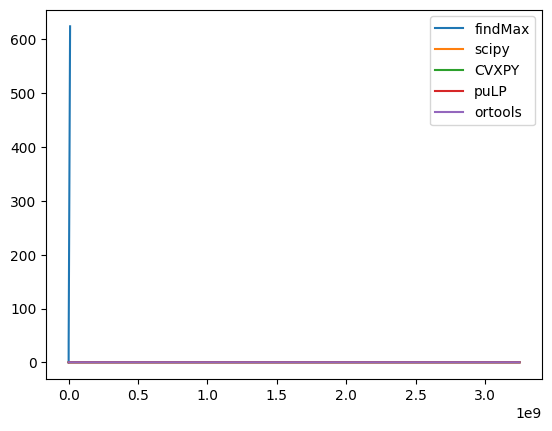

In [48]:
x = [252, 184756, 2704156, 10400600, 3247943160]
y0 = [df.loc[0, 'findMax'], df.loc[1, 'findMax'], df.loc[2, 'findMax'], df.loc[3, 'findMax'], df.loc[4, 'findMax']]
y1 = [df.loc[0, 'scipy'], df.loc[1, 'scipy'], df.loc[2, 'scipy'], df.loc[3, 'scipy'], df.loc[4, 'scipy']]
y2 = [df.loc[0, 'CVXPY'], df.loc[1, 'CVXPY'], df.loc[2, 'CVXPY'], df.loc[3, 'CVXPY'], df.loc[4, 'CVXPY']]
y3 = [df.loc[0, 'puLP'], df.loc[1, 'puLP'], df.loc[2, 'puLP'], df.loc[3, 'puLP'], df.loc[4, 'puLP']]
y4 = [df.loc[0, 'ortools'], df.loc[1, 'ortools'], df.loc[2, 'ortools'], df.loc[3, 'ortools'], df.loc[4, 'ortools']]

plt.plot(x, y0, label = "findMax")
plt.plot(x, y1, label = "scipy")
plt.plot(x, y2, label = "CVXPY")
plt.plot(x, y3, label = "puLP")
plt.plot(x, y4, label = "ortools")
plt.legend()
plt.show()

As we expect, the brute force method of computing each vertices and checking for the maximum objective function is the worst. As the number of vertices become larger, it seems to grow exponentially. 

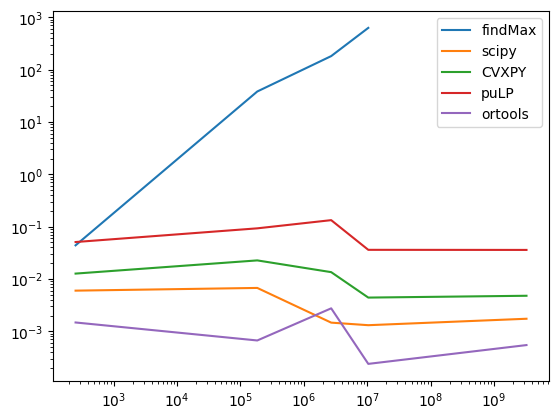

In [50]:
plt.plot(x, y0, label = "findMax")
plt.plot(x, y1, label = "scipy")
plt.plot(x, y2, label = "CVXPY")
plt.plot(x, y3, label = "puLP")
plt.plot(x, y4, label = "ortools")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

The second worse method is using puLP. It is also the only method that does worse than the brute force initially. However, it never computes more than 1 second. After puLP library, the third slowest is CVXPY. The fastest overall seems to be google ortools although it might be slower than scipy linprog once. 

Instead of checking each vertices, the simplex method does it in a way such that we aim to increase the objective function every time we choose a new vertices. This will save time by skipping other vertices and we don't need to run a for loop for 3,247,943,160 times.

### What I learned:
- formulating the function by trying a simple lp problem
- solving linear programming problem by computing each vertices
- the requirements to make sure the matrix is computable for finding objective function at each vertices
    - checking if the objective function contain negative coefficients (x $\geq$ 0)
    - the matrix is non-singular, so it has a unique solution (can be improved by calculating the determinant = 0)
- Applying a real-world problem to solve the lp method through brute force
- how to use different python libraries and finding the best python library to solve linear programming problem 